In [1]:
import scanpy as sc

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pylab as plt
from scipy import stats
import skimage.filters as skif
from sklearn.preprocessing import normalize
import glob
import os
import QCPipe
import dropkick as dk

In [3]:
adata = sc.read_h5ad('Jeremy-Filtered-data/Jeremy-Combined-data-Filtered04_dropkick.h5ad')

In [4]:
adata.raw = adata

In [5]:
adata.var['Mitochondrial'] = adata.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata,qc_vars=['Mitochondrial'],use_raw=True,inplace=True)

In [6]:
sc.pp.normalize_total(adata) #Normalize data by the median counts per single cell library
adata.X = np.arcsinh(adata.X).copy() #Transform the data by using an inverse hyperbolic sine transform, this eliminates the need for adding a pseudocount 
sc.pp.scale(adata) #Scale and center the data for interpretability

In [7]:
adata.X

array([[-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ],
       [-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ],
       [-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ],
       ...,
       [-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ],
       [-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ],
       [-0.00394224,  0.        ,  0.        , ..., -0.04925684,
         0.        ,  0.        ]], dtype=float32)

In [8]:
sc.pp.pca(adata,random_state=0)

In [9]:
neighborhood_k = np.sqrt(adata.n_obs).astype(int) #We have found that scaling the K to equal the square root of the total number of neighbors to be effective
sc.pp.neighbors(adata,n_neighbors=neighborhood_k,use_rep='X_pca',random_state=0) #Calculate this KNN based off of the PCA distances

OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
sc.tl.umap(adata,min_dist=0.25,random_state=0)

In [11]:
sc.tl.leiden(adata,resolution=2,random_state=0) #Here we use a resolution of 2, which should yield 30+ clusters. This step may take a while.

In [12]:
involved = ['GSM3972020','GSM3972017','GSM3972024','GSM3972028','GSM3972030','GSM3972013','GSM3972016','GSM3972009','GSM3972011','GSM3972022','GSM3972026']

In [13]:
adata.obs['involved'] = np.isin(adata.obs.batch,involved).astype(int)

In [14]:
adata.obs['involved'].value_counts()

0    35140
1    29205
Name: involved, dtype: int64

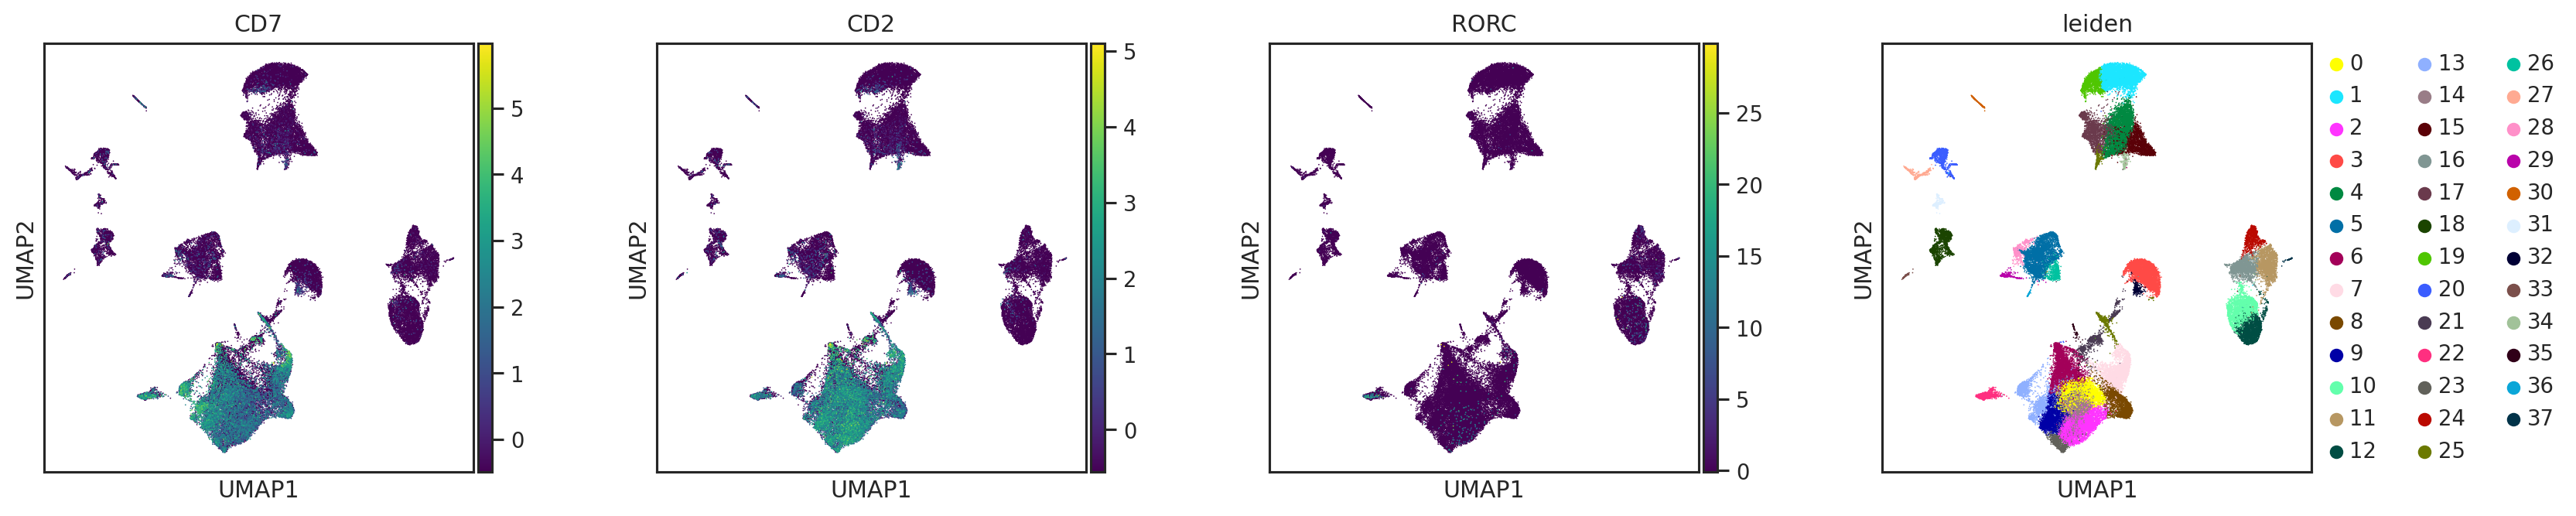

In [28]:
sc.pl.umap(adata,color=['CD7','CD2','RORC','leiden'],use_raw=False,cmap='viridis',wspace=0.3,save='CD7-CD2-RORC-leiden.png')

In [35]:
adata_RORC=adata[adata[:,'RORC'].X>0].copy()

In [36]:
adata_RORC.write_h5ad('Jeremy-Filtered-data/Jeremy-RORC-Filtered_dropkick.h5ad',compression='gzip')

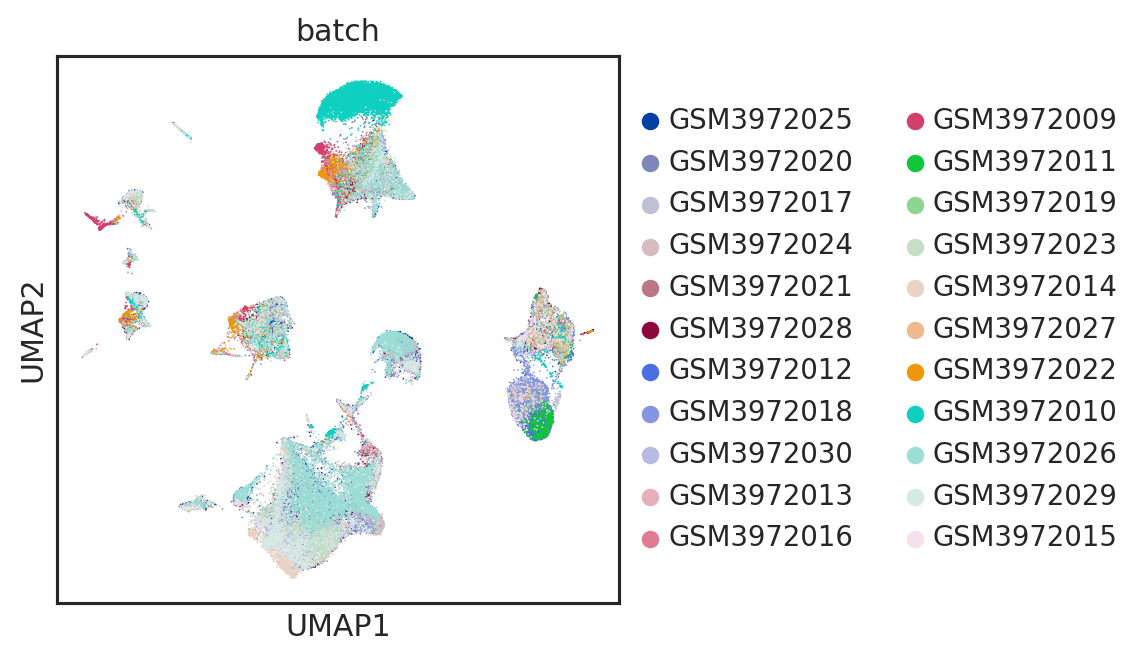

In [33]:
sc.pl.umap(adata,color=['batch'],use_raw=False,cmap='viridis')

In [34]:
adata.obs['leiden'].value_counts()

0     4338
1     4259
2     4190
3     4099
4     3862
5     3536
6     3247
7     3070
8     2385
9     2306
10    2299
11    2087
12    2073
13    2069
14    2068
15    1969
16    1929
17    1883
18    1699
19    1359
20    1168
21    1151
22     982
23     952
24     922
25     872
26     557
27     537
28     525
29     359
30     355
31     338
32     248
33     212
34     171
35     125
36      78
37      66
Name: leiden, dtype: int64

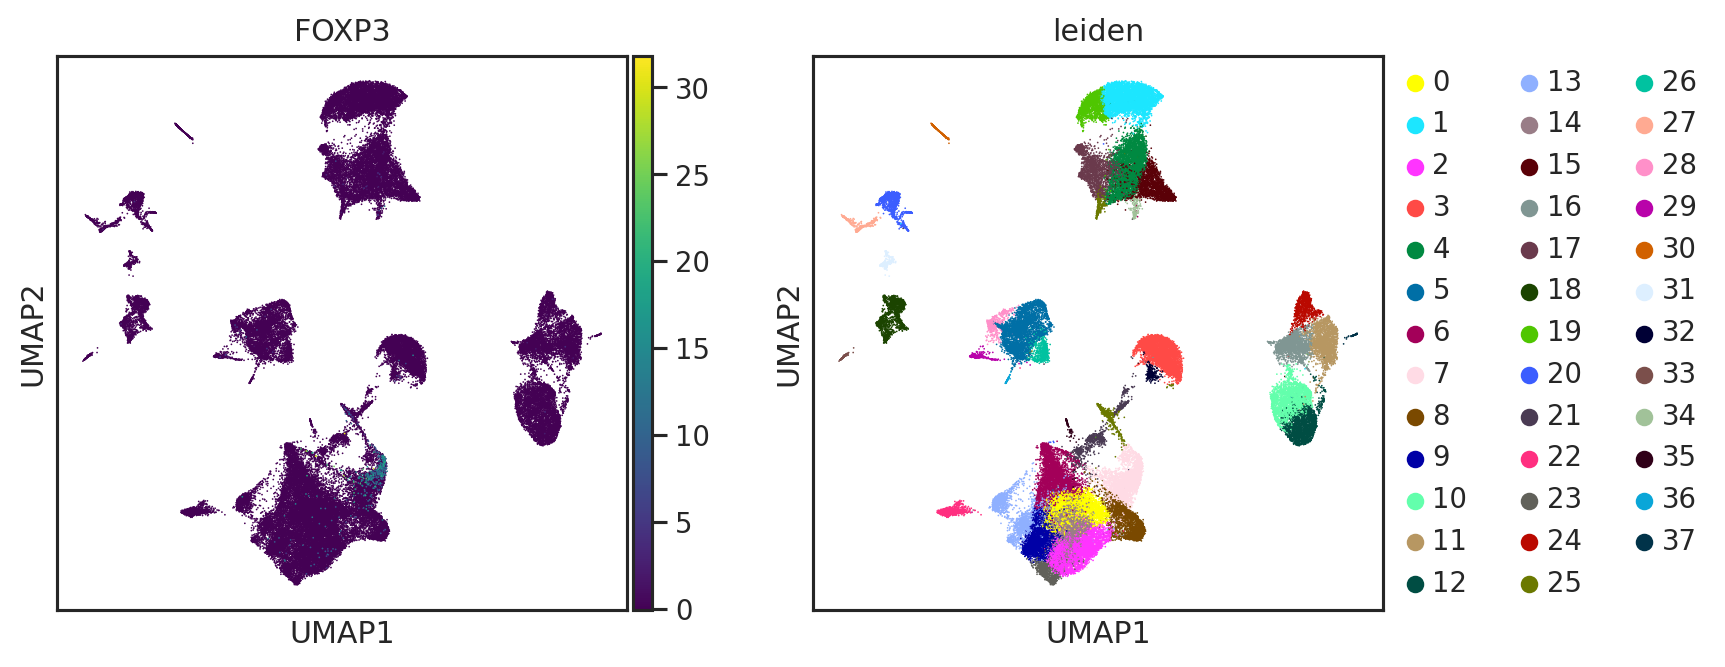

In [17]:
sc.pl.umap(adata,color=['FOXP3','leiden'],use_raw=False,cmap='viridis')

In [11]:
#adata.raw

In [18]:
selected_clusters = ['22']

In [19]:
adata.obs['Cell_Selection'] = np.isin(adata.obs['leiden'],selected_clusters).astype(str) 
#An observation vector can be set in our AnnData object for easy visualization

In [20]:
adata.obs['Cell_Selection'].value_counts()

False    63363
True       982
Name: Cell_Selection, dtype: int64

... storing 'Cell_Selection' as categorical


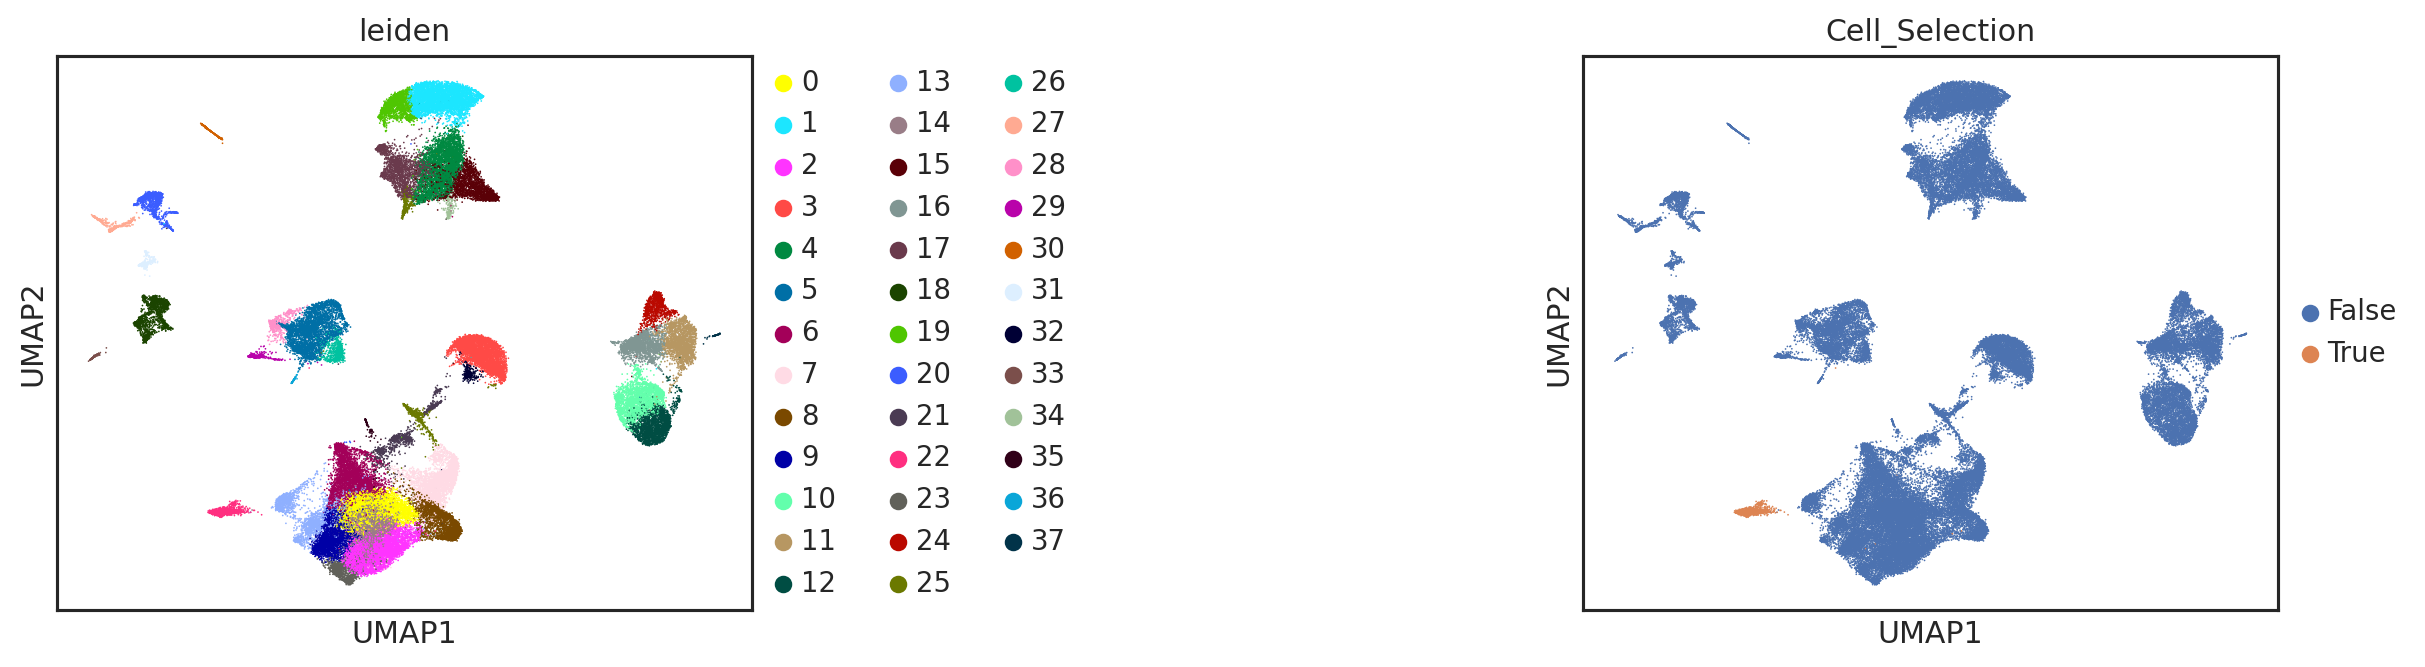

In [21]:
sc.pl.umap(adata,color=['leiden','Cell_Selection'],wspace=1)#legend_loc='on data',legend_fontoutline=True,legend_fontsize=10,cmap='viridis')

In [22]:
adata.obs['Cell_Selection'] = np.isin(adata.obs['leiden'],selected_clusters).astype(bool) 
#An observation vector can be set in our AnnData object for easy visualization

In [23]:
data_out = adata[adata.obs.leiden=='22']

In [24]:
data_out.write_h5ad('Jeremy-Filtered-data/Jeremy-Combined-data-Cluster22Filtered_dropkick.h5ad',compression='gzip')

In [23]:
data_out = QCPipe.qc.subset_cleanup(adata,selection='Cell_Selection')

In [24]:
data_out.raw.X

AttributeError: 'NoneType' object has no attribute 'X'

In [30]:
data_out.X

ArrayView([[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
adata

AnnData object with n_obs × n_vars = 64345 × 33694
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'involved', 'Cell_Selection'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell_Selection_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.pl.umap(adata,color=['IL23R','involved'],use_raw=False,cmap='viridis')